 ## **Import Library**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA


##Data Preprocessing

In [8]:
df = pd.read_csv('/content/TGM 2020-2023_eng.csv',delimiter=';', encoding='UTF-8-SIG')
df.head()

,Provinsi,Year,Reading Frequency per week,Number of Readings per Quarter,Daily Reading Duration (in minutes),Internet Access Frequency per Week,Daily Internet Duration (in minutes),Tingkat Kegemaran Membaca (Reading Interest),Category
0,Aceh,2020,4,2,95,NaN,NaN,"54,68",Moderate
1,Aceh,2021,"5,5","4,5",103,5,"83,9","64,13",High
2,Aceh,2022,5,"5,5","94,3","5,5","123,4","65,85",High
3,Aceh,2023,5,"5,5",95,"5,5",104,"66,64",Moderate
4,Bali,2020,4,"2,5",91,NaN,NaN,"56,98",Moderate


In [9]:
df['Reading Frequency per week'] = pd.to_numeric(df['Reading Frequency per week'].str.replace(',', '.'), errors='coerce')

df['Number of Readings per Quarter'] = pd.to_numeric(df['Number of Readings per Quarter'].str.replace(',', '.'), errors='coerce')

df['Daily Reading Duration (in minutes)'] = pd.to_numeric(df['Daily Reading Duration (in minutes)'].str.replace(',', '.'), errors='coerce')

df['Internet Access Frequency per Week'] = pd.to_numeric(df['Internet Access Frequency per Week'].str.replace(',', '.'), errors='coerce')

df['Daily Internet Duration (in minutes)'] = pd.to_numeric(df['Daily Internet Duration (in minutes)'].str.replace(',', '.'), errors='coerce')

df.head()

,Provinsi,Year,Reading Frequency per week,Number of Readings per Quarter,Daily Reading Duration (in minutes),Internet Access Frequency per Week,Daily Internet Duration (in minutes),Tingkat Kegemaran Membaca (Reading Interest),Category
0,Aceh,2020,4.0,2.0,95.0,NaN,NaN,"54,68",Moderate
1,Aceh,2021,5.5,4.5,103.0,5.0,83.9,"64,13",High
2,Aceh,2022,5.0,5.5,94.3,5.5,123.4,"65,85",High
3,Aceh,2023,5.0,5.5,95.0,5.5,104.0,"66,64",Moderate
4,Bali,2020,4.0,2.5,91.0,NaN,NaN,"56,98",Moderate


In [10]:
df.isnull().sum()

,0
Provinsi,0
Year,0
Reading Frequency per week,0
Number of Readings per Quarter,0
Daily Reading Duration (in minutes),0
Internet Access Frequency per Week,35
Daily Internet Duration (in minutes),35
Tingkat Kegemaran Membaca (Reading Interest),0
Category,0


#**Isi nilai Null dengan Mean**

In [11]:
means = df.mean(numeric_only=True)

for column in means.index:
    df[column] = df[column].fillna(means[column])
df.head()

,Provinsi,Year,Reading Frequency per week,Number of Readings per Quarter,Daily Reading Duration (in minutes),Internet Access Frequency per Week,Daily Internet Duration (in minutes),Tingkat Kegemaran Membaca (Reading Interest),Category
0,Aceh,2020,4.0,2.0,95.0,5.395238,113.378095,"54,68",Moderate
1,Aceh,2021,5.5,4.5,103.0,5.000000,83.900000,"64,13",High
2,Aceh,2022,5.0,5.5,94.3,5.500000,123.400000,"65,85",High
3,Aceh,2023,5.0,5.5,95.0,5.500000,104.000000,"66,64",Moderate
4,Bali,2020,4.0,2.5,91.0,5.395238,113.378095,"56,98",Moderate


In [12]:
df.isnull().sum()

,0
Provinsi,0
Year,0
Reading Frequency per week,0
Number of Readings per Quarter,0
Daily Reading Duration (in minutes),0
Internet Access Frequency per Week,0
Daily Internet Duration (in minutes),0
Tingkat Kegemaran Membaca (Reading Interest),0
Category,0


#**EDA**

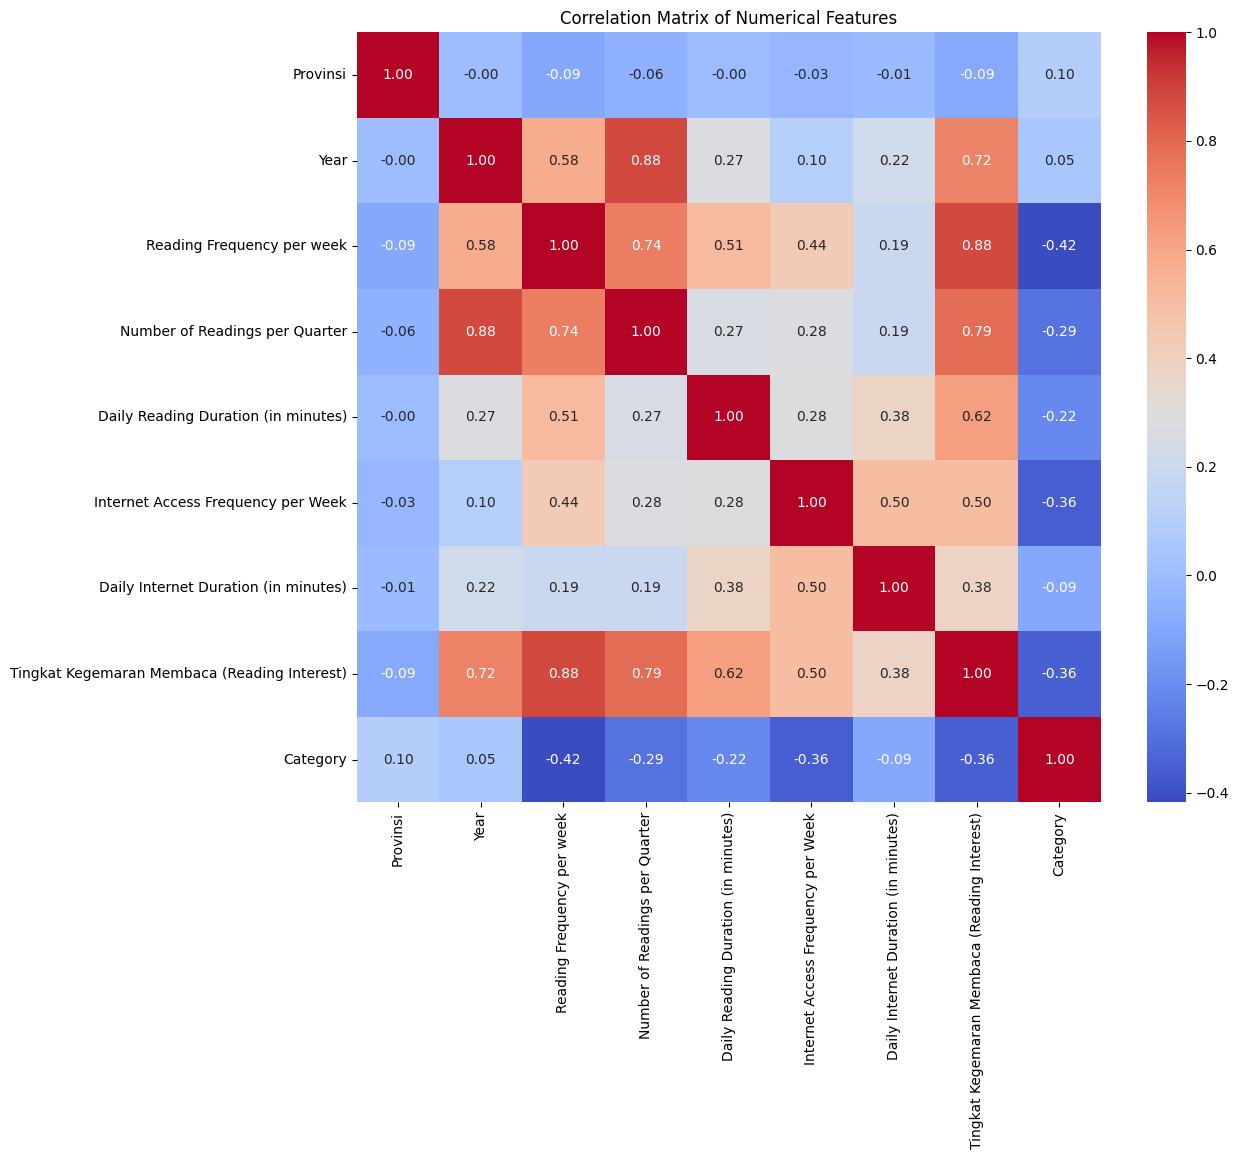

In [13]:
for col in df.select_dtypes(include=['object', 'category']):
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('category').cat.codes


numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##**Selected Feature**

In [14]:
X = df.drop('Category', axis=1)  # Features
y = df['Category']  # Target variable

# Convert non-numeric columns to numeric using one-hot encoding or other methods
X = pd.get_dummies(X, columns=['Provinsi'])

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)

selected_df = pd.DataFrame(X_new, columns=selected_features)
selected_df['Category'] = y

selected_df

Selected features: Index(['Reading Frequency per week', 'Number of Readings per Quarter',
       'Daily Reading Duration (in minutes)',
       'Internet Access Frequency per Week',
       'Tingkat Kegemaran Membaca (Reading Interest)'],
      dtype='object')


,Reading Frequency per week,Number of Readings per Quarter,Daily Reading Duration (in minutes),Internet Access Frequency per Week,Tingkat Kegemaran Membaca (Reading Interest),Category
0,4.0,2.0,95.0,5.395238,18.0,1
1,5.5,4.5,103.0,5.000000,84.0,0
2,5.0,5.5,94.3,5.500000,106.0,0
3,5.0,5.5,95.0,5.500000,112.0,1
4,4.0,2.5,91.0,5.395238,39.0,1
...,...,...,...,...,...,...
135,5.5,5.5,104.0,6.000000,126.0,1
136,5.0,2.5,123.0,5.395238,104.0,0
137,6.0,5.5,106.6,7.000000,134.0,0
138,5.5,7.0,111.1,7.000000,137.0,0


##**Model Time Series (ARIMA)**

Mean Absolute Error: 38.029946932979435


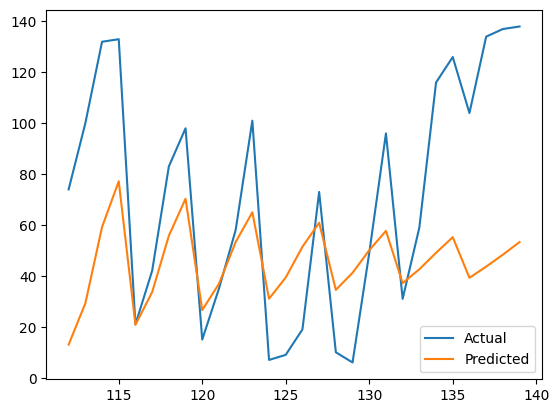

In [16]:
target_column = 'Tingkat Kegemaran Membaca (Reading Interest)'
data = selected_df[target_column]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))


train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]


model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()


predictions = model_fit.predict(start=len(train_data), end=len(scaled_data)-1)

predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

mae = mean_absolute_error(scaler.inverse_transform(test_data), predictions)
print(f"Mean Absolute Error: {mae}")

pred_df = pd.DataFrame({'prediction': predictions.flatten()}, index = data.index[int(len(scaled_data) * 0.8):])
actual_df = pd.DataFrame({'actual': scaler.inverse_transform(test_data).flatten()}, index = data.index[int(len(scaled_data) * 0.8):])

#Plot
plt.plot(actual_df, label='Actual')
plt.plot(pred_df, label='Predicted')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarni

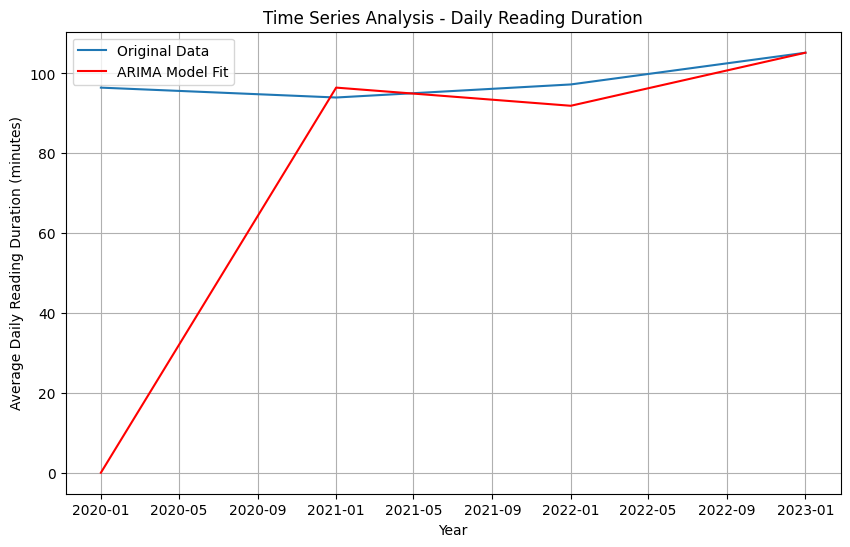

In [17]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

data_for_arima = df.groupby('Year')['Daily Reading Duration (in minutes)'].mean()

model = ARIMA(data_for_arima, order=(5, 1, 0))
results = model.fit()


plt.figure(figsize=(10, 6))
plt.plot(data_for_arima, label='Original Data')
plt.plot(results.fittedvalues, color='red', label='ARIMA Model Fit')
plt.title('Time Series Analysis - Daily Reading Duration')
plt.xlabel('Year')
plt.ylabel('Average Daily Reading Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()


#**Memprediksi 3 Tahun Kedepan**

<ipython-input-18-1f99e7e7a77c>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


                 Year    Forecast    Lower CI    Upper CI
2024-01-01 2024-12-31  115.217518  115.197296  115.237741
2025-01-01 2025-12-31  124.025868  123.980788  124.070948
2026-01-01 2026-12-31  128.740064  128.661500  128.818627


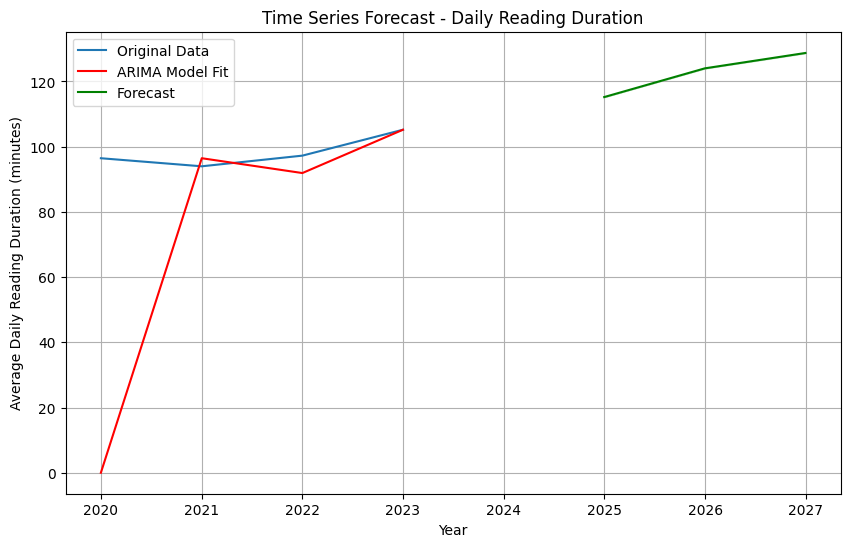

In [18]:
forecast_steps = 3  # Berapa tahun kedepan
forecast = results.get_forecast(steps=forecast_steps)

forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

last_year = data_for_arima.index[-1]
forecast_index = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'Forecast': forecast_values,
    'Lower CI': confidence_intervals['lower Daily Reading Duration (in minutes)'],
    'Upper CI': confidence_intervals['upper Daily Reading Duration (in minutes)']
})

print(forecast_df)

plt.figure(figsize=(10, 6))
plt.plot(data_for_arima, label='Original Data')
plt.plot(results.fittedvalues, color='red', label='ARIMA Model Fit')
plt.plot(forecast_index, forecast_values, color='green', label='Forecast')
plt.fill_between(forecast_index, confidence_intervals['lower Daily Reading Duration (in minutes)'],
                 confidence_intervals['upper Daily Reading Duration (in minutes)'], color='green', alpha=0.2)
plt.title('Time Series Forecast - Daily Reading Duration')
plt.xlabel('Year')
plt.ylabel('Average Daily Reading Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()